In [12]:
from main import *
%matplotlib inline

# Introduction

Alice, Bob, and Daniel are friends learning machine learning together. After watching a few lectures, they are very proud of having learned many useful tools, including linear and logistic regression, non-linear features, regularization, and kernel tricks. To see how these methods can be used to solve a real life problem, they decide to get their hands dirty with the famous digit recognition problem using the MNIST (Mixed National Institute of Standards and Technology) database.

Hearing that you are an excellent student in the MITx machine learning class with solid understanding of the material and great coding ability in Python, they decide to invite you to their team and help them with implementing these different algorithms.

The MNIST database contains binary images of handwritten digits commonly used to train image processing systems. The digits were collected from among Census Bureau employees and high school students. The database contains 60,000 training digits and 10,000 testing digits, all of which have been size-normalized and centered in a fixed-size image of 28 × 28 pixels. Many methods have been tested with this dataset and in this project, you will get a chance to experiment with the task of classifying these images into the correct digit using some of the methods you have learned so far.

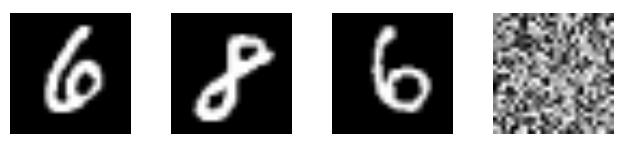

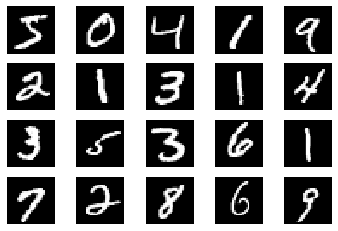

In [13]:
# Load MNIST data
train_x, train_y, test_x, test_y = get_MNIST_data()
# Plot the first 20 images of the training set
plot_images(train_x[0:20, :])

# Linear Regression with Closed Form Solution

After seeing the problem, your classmate Alice immediately argues that we can apply a linear regression model, as the labels are numbers from 0-9, very similar to the example we learned from the lecture. Though being a little doubtful, you decide to have a try and start simple by using the raw pixel values of each image as features.

Alice wrote a skeleton code `run_linear_regression_on_MNIST` in main.py, but she needs your help to complete the code and make the model work.


### Closed Form Solution of Linear Regression

Recall:

$ \theta = (X^T X + \lambda I)^{-1} X^T Y $

where $ I $ is the identity matrix.

Write a function `closed_form` that computes this closed form solution given features $ X $, labels $ Y $, and the regularization parameter $ \lambda $.

In [ ]:
def closed_form(X, Y, lambda_factor):
    """
    Computes the closed form solution of linear regression with L2 regularization

    Args:
        X - (n, d + 1) NumPy array (n datapoints each with d features plus the bias feature in the first dimension)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        lambda_factor - the regularization constant (scalar)
    Returns:
        theta - (d + 1, ) NumPy array containing the weights of linear regression. Note that theta[0]
        represents the y-axis intercept of the model and therefore X[0] = 1
    """
    n = X.shape[1]
    I = np.eye(n)
    A = np.linalg.inv(X.T @ X + lambda_factor * I)
    
    theta =  A @ X.T @ Y
    
    return theta

    raise NotImplementedError

Test on given problem:

In [14]:
X = np.array([[0.69665959, 0.1176613 ],
 [0.31760089, 0.79518646],
 [0.00999331, 0.47771456],
 [0.74631743, 0.97829618],
 [0.86107641, 0.48218395],
 [0.63610549, 0.57816273],
 [0.28001767, 0.15622796],
 [0.88951132, 0.29489633],
 [0.23763551, 0.15654827],
 [0.17375538, 0.10250591]])
Y = np.array([0.47635682, 0.59191978, 0.35434797, 0.7197702,  0.04977253, 0.62177976,
 0.86412764, 0.86252658, 0.49849733, 0.29968752])
lambda_factor = 0.32809342846061595
# Submission output: [0.49272364 0.41464331]

In [15]:
closed_form(X, Y, lambda_factor)

array([0.49272363, 0.41464332])

## Test Error on Linear Regression
Apply the linear regression model on the test set. For classification purpose, you decide to round the predicted label into numbers 0-9.

**Note**: For this project we will be looking at the error rate defined as the fraction of labels that don't match the target labels, also known as the "gold labels" or ground truth. 

In [16]:
print('Linear Regression test_error =', run_linear_regression_on_MNIST(lambda_factor=1))

Linear Regression test_error = 0.7697


In [17]:
print('Linear Regression test_error =', run_linear_regression_on_MNIST(lambda_factor=.1))

Linear Regression test_error = 0.7698


In [18]:
print('Linear Regression test_error =', run_linear_regression_on_MNIST(lambda_factor=.01))

Linear Regression test_error = 0.7702


# Support Vector Machine

Bob thinks it is clearly not a regression problem, but a classification problem. He thinks that we can change it into a binary classification and use the support vector machine we learned in Lecture 4 to solve the problem. In order to do so, he suggests that we can build an one vs. rest model for every digit. For example, classifying the digits into two classes: 0 and not 0.

Bob wrote a function `run_svm_one_vs_rest_on_MNIST` where he changed the labels of digits 1-9 to 1 and keeps the label 0 for digit 0. He also found that sklearn package contains an SVM model that you can use directly. He gave you the link to this model and hopes you can tell him how to use that.

In [ ]:
def one_vs_rest_svm(train_x, train_y, test_x):
    """
    Trains a linear SVM for binary classifciation

    Args:
        train_x - (n, d) NumPy array (n datapoints each with d features)
        train_y - (n, ) NumPy array containing the labels (0 or 1) for each training data point
        test_x - (m, d) NumPy array (m datapoints each with d features)
    Returns:
        pred_test_y - (m,) NumPy array containing the labels (0 or 1) for each test data point
    """
    clf = LinearSVC(random_state=0, C=0.1)
    clf.fit(train_x, train_y) 
    
    return clf.predict(test_x)    
    
    raise NotImplementedError

In [19]:
print('SVM one vs. rest test_error:', run_svm_one_vs_rest_on_MNIST())

SVM one vs. rest test_error: 0.0075


In fact, `sklearn` already implements a multiclass SVM with a one-vs-rest strategy. Use `LinearSVC` to build a multiclass SVM model.

In [ ]:
def multi_class_svm(train_x, train_y, test_x):
    """
    Trains a linear SVM for multiclass classifciation using a one-vs-rest strategy

    Args:
        train_x - (n, d) NumPy array (n datapoints each with d features)
        train_y - (n, ) NumPy array containing the labels (int) for each training data point
        test_x - (m, d) NumPy array (m datapoints each with d features)
    Returns:
        pred_test_y - (m,) NumPy array containing the labels (int) for each test data point
    """
    clf = LinearSVC(random_state=0, C=0.1)
    clf.fit(train_x, train_y) 
    
    return clf.predict(test_x)    

    raise NotImplementedError

def run_multiclass_svm_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    pred_test_y = multi_class_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error

In [20]:
from main import run_multiclass_svm_on_MNIST
print('Multiclass SVM test_error:', run_multiclass_svm_on_MNIST())

Multiclass SVM test_error: 0.0819


# Multinomial (Softmax) Regression and Gradient Descent
Daniel suggests that instead of building ten models, we can expand a single logistic regression model into a multinomial regression and solve it with similar gradient descent algorithm.

The main function which you will call to run the code you will implement in this section is run_softmax_on_MNIST in main.py (already implemented). In the appendix at the bottom of this page, we describe a number of the methods that are already implemented for you in softmax.py that will be useful.

In order for the regression to work, you will need to implement three methods. Below we describe what the functions should do. We have included some test cases in test.py to help you verify that the methods you have implemented are behaving sensibly.

## Compute Softmax Probabilities
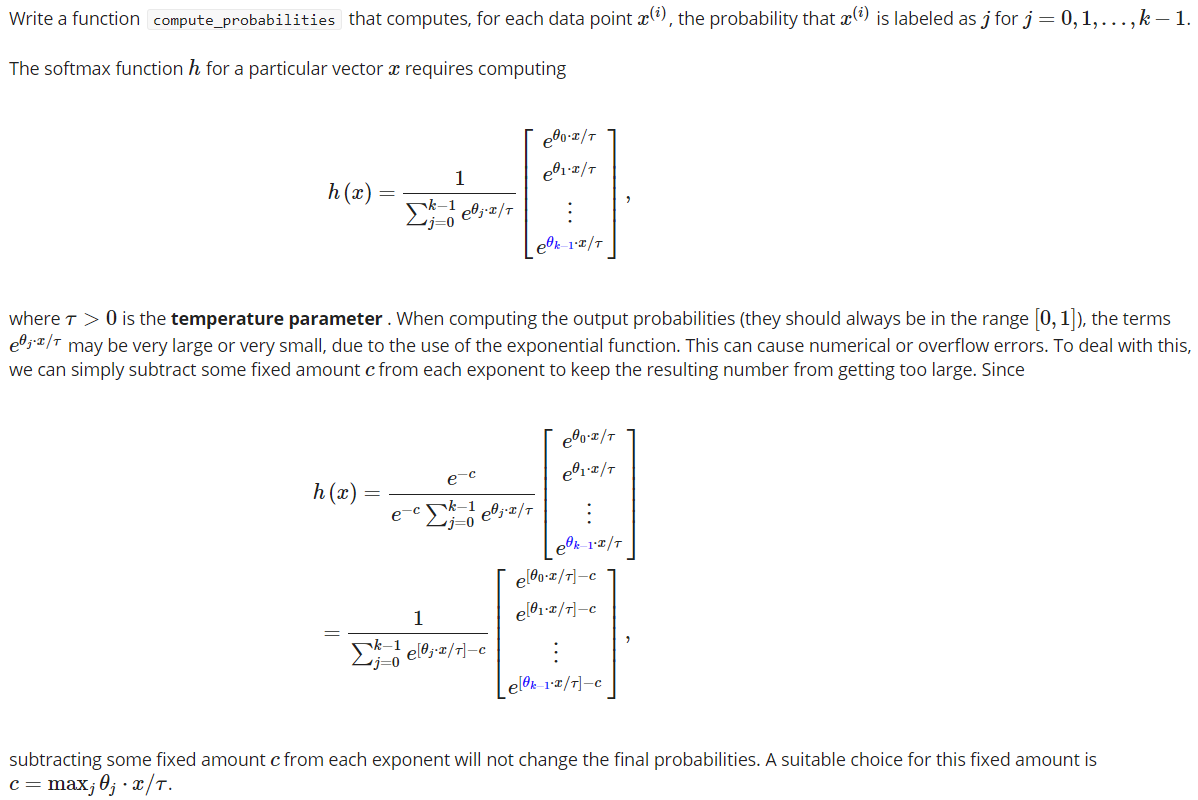

In [ ]:
def compute_probabilities(X, theta, temp_parameter):
    """
    Computes, for each datapoint X[i], the probability that X[i] is labeled as j
    for j = 0, 1, ..., k-1

    Args:
        X - (n, d) NumPy array (n datapoints each with d features)
        theta - (k, d) NumPy array, where row j represents the parameters of our model for label j
        temp_parameter - the temperature parameter of softmax function (scalar)
    Returns:
        H - (k, n) NumPy array, where each entry H[j][i] is the probability that X[i] is labeled as j
    """
    # Preliminary calculation to find c
    tau = temp_parameter
    A = theta @ (X.T / tau)
    
    # Calculate c
    c = np.amax(A, axis=0)
    
    # Pre-calculate H and denominator
    H = np.exp(A - c)
    den = np.sum(H, axis=0)
    
    # Divide each column by the appropriate value
    H = H / den
    
    return H
    
    raise NotImplementedError

## Cost Function

The cost function  $J(θ)$  is given by:

\begin{equation}
  J(\theta ) = -\frac{1}{n}\Bigg[\sum _{i=1}^ n \sum _{j={{0}} }^{{{k-1}} } [[y^{(i)} == j]] \log {\frac{e^{\theta _ j \cdot x^{(i)} / \tau }}{\sum _{l={{0}} }^{{{k-1}} } e^{\theta _ l \cdot x^{(i)} / \tau }}}\Bigg] + \frac{\lambda }{2}\sum _{{{j=0}} }^{{{k-1}} }\sum _{{{i}} =0}^{d-1} \theta _{{{ji}} }^2
\end{equation}

In [ ]:
def compute_cost_function(X, Y, theta, lambda_factor, temp_parameter):
    """
    Computes the total cost over every datapoint.

    Args:
        X - (n, d) NumPy array (n datapoints each with d features)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        theta - (k, d) NumPy array, where row j represents the parameters of our
                model for label j
        lambda_factor - the regularization constant (scalar)
        temp_parameter - the temperature parameter of softmax function (scalar)

    Returns
        c - the cost value (scalar)
    """
    # Initialize cost
    c = 0
    
    # Compute probabilities with previous function (k,n)
    p = np.clip(compute_probabilities(X, theta, temp_parameter), 1e-15, 1-1e-15)
    
    # Loop through datapoints to calculate first term
    for i in range(X.shape[0]): # Loop through rows
        for j in range(theta.shape[0]): # Loop through thetas
            if Y[i] == j:
                c += np.log(p[j, i])
    
    # Complete calculation for first term
    c = -(1 / X.shape[0]) * c
    
    # Compute second term and add to c
    c += 0.5 * lambda_factor * (np.sum(theta ** 2))
    
    return c
    
    raise NotImplementedError


## Gradient Descent
Now, in order to run the gradient descent algorithm to minimize the cost function, we need to take the derivative of  $J(θ)$  wrt a particular  $θ_m$. 

\begin{align}
   \frac{\partial J(\theta )}{\partial \theta _ m} = \frac{\partial }{\partial \theta _ m}\Bigg[-\frac{1}{n}\Bigg[\sum _{i=1}^ n \sum _{j=0}^{k-1} [[y^{(i)} == j]] \log p(y^{(i)} = j | x^{(i)}, \theta ) \Bigg] + \frac{\lambda }{2}\sum _{j=0}^{k-1}\sum _{i=0}^{d-1} \theta _{ji}^2\Bigg] \\
    = -\frac{1}{\tau n} \sum _{i = 1} ^{n} [x^{(i)}([[y^{(i)} == m]] - p(y^{(i)} = m | x^{(i)}, \theta ))] + \lambda \theta _ m
\end{align}

To run gradient descent, we will update  $\theta$  at each step with $\theta \leftarrow \theta - \alpha \nabla _{\theta } J(\theta )$, where $\alpha$ is the learning rate.

In [18]:
def run_gradient_descent_iteration(X, Y, theta, alpha, lambda_factor, temp_parameter):
    """
    Runs one step of batch gradient descent

    Args:
        X - (n, d) NumPy array (n datapoints each with d features)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        theta - (k, d) NumPy array, where row j represents the parameters of our
                model for label j
        alpha - the learning rate (scalar)
        lambda_factor - the regularization constant (scalar)
        temp_parameter - the temperature parameter of softmax function (scalar)

    Returns:
        theta - (k, d) NumPy array that is the final value of parameters theta
    """
    itemp=1./temp_parameter
    num_examples = X.shape[0]
    num_labels = theta.shape[0]
    probabilities = compute_probabilities(X, theta, temp_parameter)
    # M[i][j] = 1 if y^(j) = i and 0 otherwise.
    M = sparse.coo_matrix(([1]*num_examples, (Y,range(num_examples))), shape=(num_labels,num_examples)).toarray()
    non_regularized_gradient = np.dot(M-probabilities, X)
    non_regularized_gradient *= -itemp/num_examples
    return theta - alpha * (non_regularized_gradient + lambda_factor * theta)

## Test Error on Softmax Regression

In [19]:
def run_softmax_on_MNIST(temp_parameter=1):
    """
    Trains softmax, classifies test data, computes test error, and plots cost function

    Runs softmax_regression on the MNIST training set and computes the test error using
    the test set. It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Saves the final theta to ./theta.pkl.gz

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    theta, cost_function_history = softmax_regression(train_x, train_y, temp_parameter, alpha= 0.3, lambda_factor = 1.0e-4, k = 10, num_iterations = 150)
    plot_cost_function_over_time(cost_function_history)
    test_error = compute_test_error(test_x, test_y, theta, temp_parameter)
    # Save the model parameters theta obtained from calling softmax_regression to disk.
    write_pickle_data(theta, "./theta.pkl.gz")

    return test_error

In [1]:
from main import run_softmax_on_MNIST
run_softmax_on_MNIST(temp_parameter=1)

KeyboardInterrupt: 

# Dimensionality Reduction Using PCA

PCA finds (orthogonal) directions of maximal variation in the data. In this problem we're going to project our data onto the principal components and explore the effects on performance.

## Project onto Principal Components
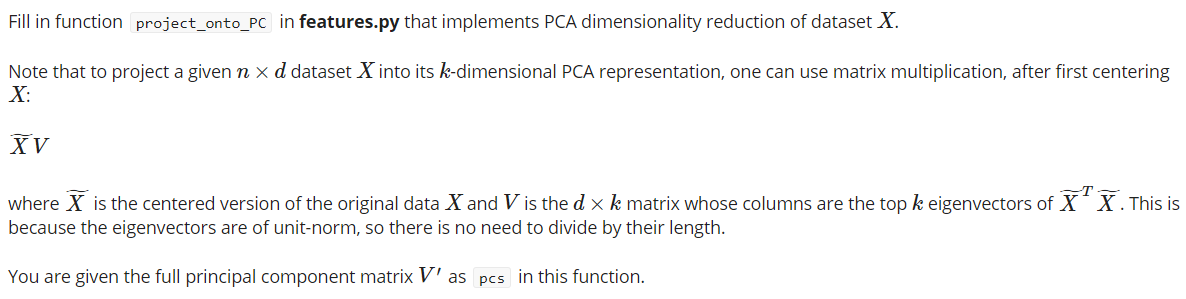

In [ ]:
def project_onto_PC(X, pcs, n_components):
    """
    Given principal component vectors pcs = principal_components(X)
    this function returns a new data array in which each sample in X
    has been projected onto the first n_components principcal components.
    """
    # TODO: first center data using the centerData() function.
    X = center_data(X)
    # TODO: Return the projection of the centered dataset
    #       on the first n_components principal components.
    #       This should be an array with dimensions: n x n_components.
    return X @ pcs[:,range(n_components)]
    # Hint: these principal components = first n_components columns
    #       of the eigenvectors returned by principal_components().
    #       Note that each eigenvector is already be a unit-vector,
    #       so the projection may be done using matrix multiplication.
    raise NotImplementedError


Note: we only use the training dataset to determine the principal components. It is improper to use the test dataset for anything except evaluating the accuracy of our predictive model. If the test data is used for other purposes such as selecting good features, it is possible to overfit the test set and obtain overconfident estimates of a model's performance.

## Testing PCA

Use `project_onto_PC` to compute a 18-dimensional PCA representation of the MNIST training and test datasets, as illustrated in main.py.

Retrain your softmax regression model (using the original labels) on the MNIST training dataset and report its error on the test data, this time using these 18-dimensional PCA-representations rather than the raw pixel values.

If your PCA implementation is correct, the model should perform nearly as well when only given 18 numbers encoding each image as compared to the 784 in the original data (error on the test set using PCA features should be around 0.15). This is because PCA ensures these 18 feature values capture the maximal amount of variation from the original 784-dimensional data.

In [4]:
from main import principal_components, project_onto_PC, get_MNIST_data, softmax_regression

# Load MNIST data
train_x, train_y, test_x, test_y = get_MNIST_data()

n_components = 18
pcs = principal_components(train_x)
train_pca = project_onto_PC(train_x, pcs, n_components)
test_pca = project_onto_PC(test_x, pcs, n_components)

theta, cost_function_history = softmax_regression(train_x, train_y, temp_parameter=1, alpha= 0.3, lambda_factor = 1.0e-4, k = 10, num_iterations = 150)
plot_cost_function_over_time(cost_function_history)
test_error = compute_test_error(test_x, test_y, theta, temp_parameter)

KeyboardInterrupt: 

# Cubic Features

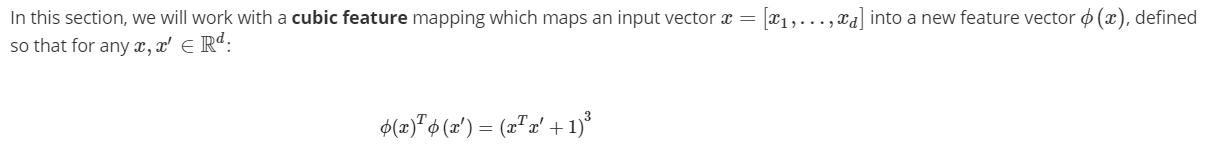

## Computing Cubic Features
In 2-D, let $ x=[x_1,x_2] $. Write down the explicit cubic feature mapping $ \phi (x)$  as a vector; i.e.,  $ \phi(x)=[f_1(x_1,x_2),⋯,f_N(x_1,x_2)]$.

In [ ]:
def phi(x):
    x_1 = x[0]
    x_2 = x[1]
    
    return np.array([1, 
                     x_1**3, 
                     x_2**3, 
                     sqrt(3) * x_1, 
                     sqrt(3) * x_2, 
                     sqrt(3) * x_1**2, 
                     sqrt(3) * x_1**2 * x_2, 
                     sqrt(3) * x_2**2, 
                     sqrt(3) * x_2**2 * x_1, 
                     sqrt(6) * x_1 * x_2])

# Scratchwork

In [ ]:
n, d, k = 3, 5, 7
X = np.arange(0, n * d).reshape(n, d)
zeros = np.zeros((k, d))
temp_parameter = 0.2
exp_res = np.ones((k, n)) / k
    
theta = np.arange(0, k * d).reshape(k, d)
exp_res = np.zeros((k, n))
exp_res[-1] = 1

In [ ]:
X

In [ ]:
X.shape

In [ ]:
for i in X:
    print(i)

In [ ]:
for i in range( X.shape[0] ):
    print(X[i])

In [ ]:
for col in X.T:
    print(col)

In [ ]:
theta

In [ ]:
compute_probabilities(X, theta, temp_parameter)

In [ ]:
A = theta @ (X.transpose() / temp_parameter)
A

In [ ]:
c = np.amax(A, axis=0)
c

In [ ]:
A - c

In [ ]:
np.exp(A - c)

In [ ]:
np.exp(A - c) / np.sum(A - c, axis=0)

In [ ]:
z = np.array([1, 2, 3])
z

In [ ]:
np.exp(z)